# Chapter 5 - Exercises

## 1.

y = 1.759193148105248*x + 4.69359654825405


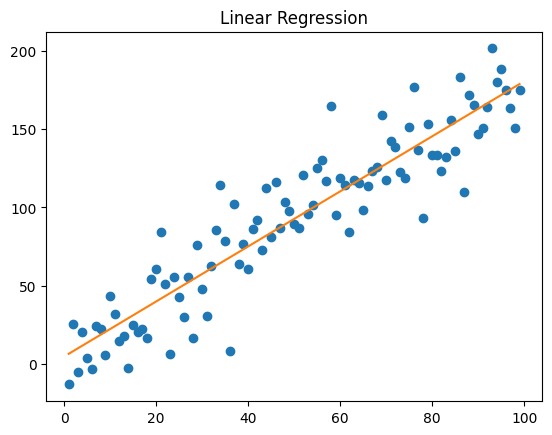

In [136]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

df = pd.read_csv("chapter_05.csv")
x = df.to_numpy()[:, 0:1]
y = df.to_numpy()[:, 1]

reg = LinearRegression().fit(x, y)

m = reg.coef_.flatten()[0]
b = reg.intercept_.flatten()[0]

print(f"y = {m}*x + {b}")

plt.subplot()
plt.plot(x, y, 'o')
plt.plot(x, m*x+b)
plt.title("Linear Regression")
plt.show()

## 2.

In [139]:
import math

r = math.sqrt(reg.score(x, y))
print(f"Correlation coefficient: r = {r}")

df.corr(method='pearson')

Correlation coefficient: r = 0.9242100628677159


,x,y
x,1.00000,0.92421
y,0.92421,1.00000


Lower: -1.9842169515086832 | Upper: 1.9842169515086827


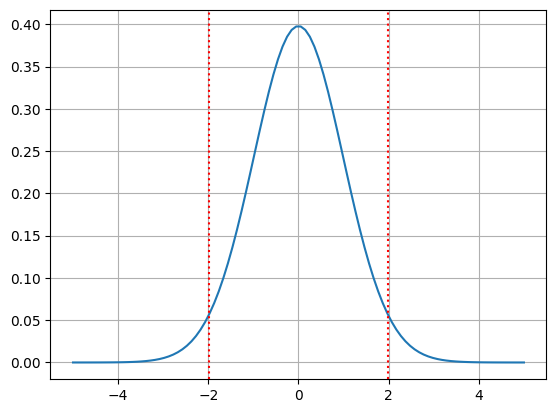

Test value: t = 23.958063768089133
With >= 95% confidence the correlation is not occuring by chance


In [151]:
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np

n = len(x)

plt.subplot()
plt.grid(True, which="both")

x = np.linspace(-5, 5, 100)
plt.plot(x, [stats.t.pdf(i, n-1) for i in x])

plt.axvline(x = stats.t.ppf(0.05/2, n-1), color = 'r', linestyle = ':')
plt.axvline(x = stats.t.ppf(1-0.05/2, n-1), color = 'r', linestyle = ':')

lower = stats.t.ppf(0.05/2, n-1)
upper = stats.t.ppf(1-0.05/2, n-1)

print(f"Lower: {lower} | Upper: {upper}")

plt.show()

t = r / math.sqrt( (1 - r**2) / (n - 2))

print(f"Test value: t = {t}")

print("With >= 95% confidence ", end="")
if t < lower or t > upper:
    print("the correlation is not occuring by chance")
else:
    print("the correlation is occuring by chance")